In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

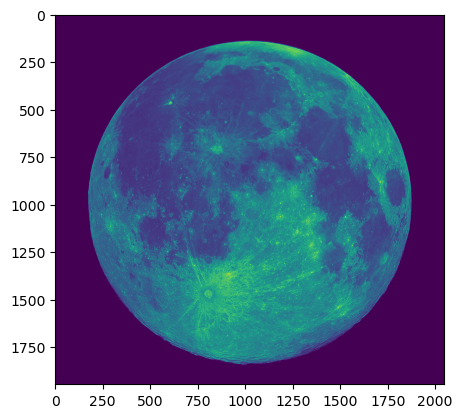

In [2]:
image = Image.open('moon.jpeg')
image_array = np.array(image)[:,:,0]
plt.imshow(image_array);

In [3]:
image_array.shape, image_array.size

((1946, 2048), 3985408)

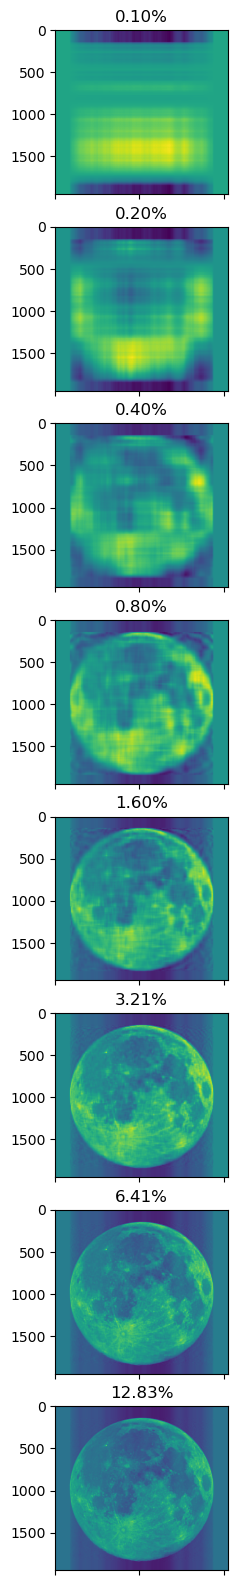

In [4]:
N = (1,2,4,8,16,32,64, 128)
for n, ax in zip(N, plt.subplots(len(N), figsize=(10,20))[1]):
    pca = PCA(n_components=n).fit(image_array)
    A = pca.transform(image_array)
    B = pca.components_
    reconstruction = A@B
    ax.imshow(reconstruction)
    ax.set_title(f'{100*(A.size + B.size)/image_array.size:.2f}%')
    ax.set_xticklabels('')